## Análise exploratória dos Dados

In [1]:
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt

O objetivo é usarmos as técnicas de classificação para determinar se uma pessoa irá ganhar mais do que 50 mil ou não, esse dataset é o Census.

In [2]:
data = pd.read_csv('../data/census.csv')

In [3]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Verificando valores nulos

In [5]:
data.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Não foi encontrado nenhum dado nulo, porém vamos continuar explorando os dados para vermos se não tem nenhuma outra coisa como carácteres nulos como exemplo: none, ?, not information etc. 

Valores estatísticos. 

In [6]:
data.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Valores únicos

Esses valores são importantes para que a gente possa construir gráficos e também saber quanto valor tem cada classe.

In [8]:
valores_unicos = []

for i in data.columns[0:15].tolist():
    print(i, ':', len(data[i].value_counts()))
    valores_unicos.append(len(data[i].value_counts()))

age : 73
workclass : 9
final-weight : 21648
education : 16
education-num : 16
marital-status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
capital-gain : 119
capital-loos : 92
hour-per-week : 94
native-country : 42
income : 2


Repare que nossa variável alvo income tem apenas 2 valores possíveis, por se tratar de um problema de classificação isso é normal já que a maioria dos modelos usam dados do tipo booleano sim/não para classificação. 

Agrupamento por sexo:

In [9]:
data.groupby(['sex']).size()

sex
Female    10771
Male      21790
dtype: int64

Repare que temos mais que o dobro de homens nessa base de dados conforme gráfico abaixo.

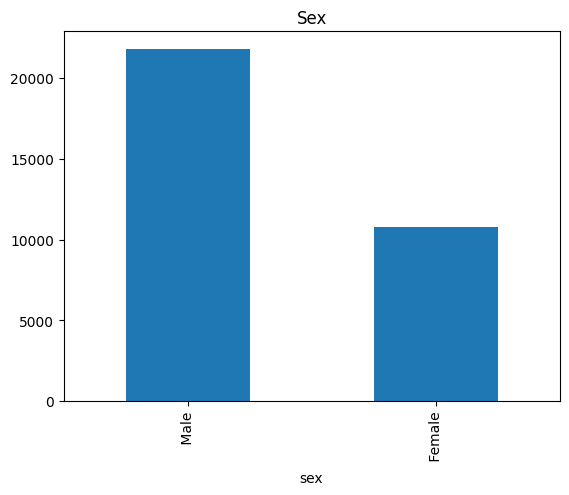

In [10]:
data['sex'].value_counts().plot(kind='bar', title = 'Sex');

Verificando o balanceamento da variável alvo.

Para isso vamos criar um gráfico de barras que irá correlacionar o número em anos de estudo com income acima e abaixo de 50 mil

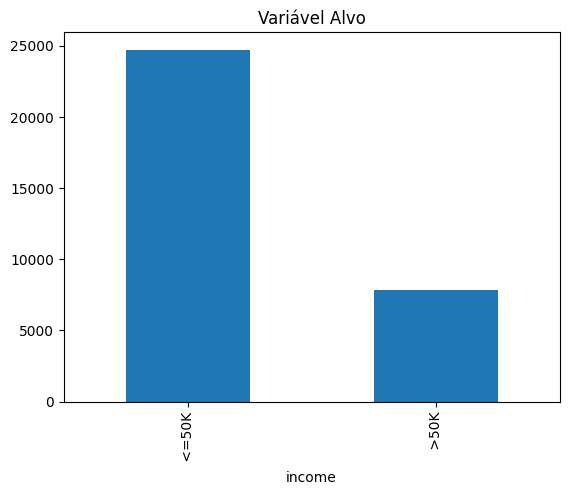

In [11]:
data['income'].value_counts().plot(kind = 'bar', title = 'Variável Alvo');

Temos um problema aqui precisamos balancear as categorias para que nosso modelo de classificação possa funcionar melhore evitar um viés após ser treinado porém na parte de criação do modelo iremos fazer isso. 

Vamos ver os demais gráficos.


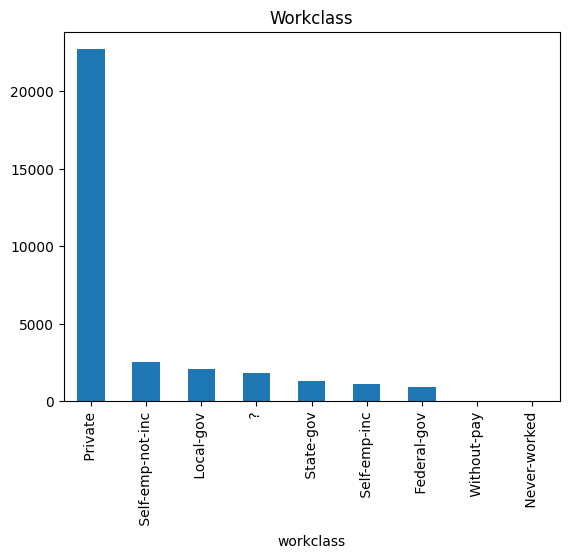

In [12]:
data['workclass'].value_counts().plot(kind='bar', title = 'Workclass');

Repare em como a classe private que se trata de pessoas que trabalham no setor privado é bem maior que as demais. Isso também é normal já que nem todos da população irá trabalhar no setor público, então aqui não se faz necessário equilibrar as classes.

Mas um problema temos que tratar essas classes com ponto de interrogação. 

vamos ver o boxplot da classe final-weight

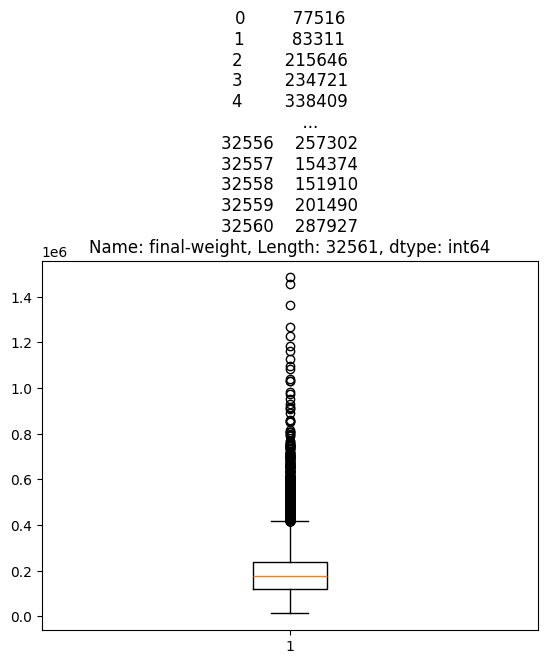

In [13]:
plt.boxplot(data['final-weight']);
plt.title(data['final-weight']);

Temos bastante outliers isso demosntra que devemos normalizar os dados, vamos usar isso com a normalização robusta que é baseada na mediana e não está sujeita aos outliers. 

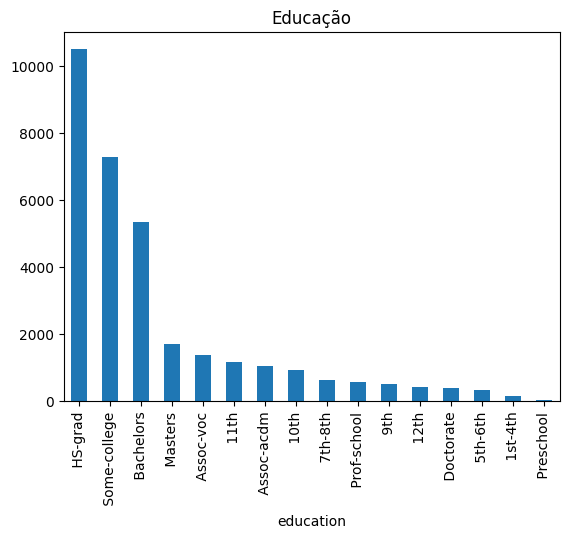

In [14]:
data['education'].value_counts().plot(kind='bar', title = 'Educação');

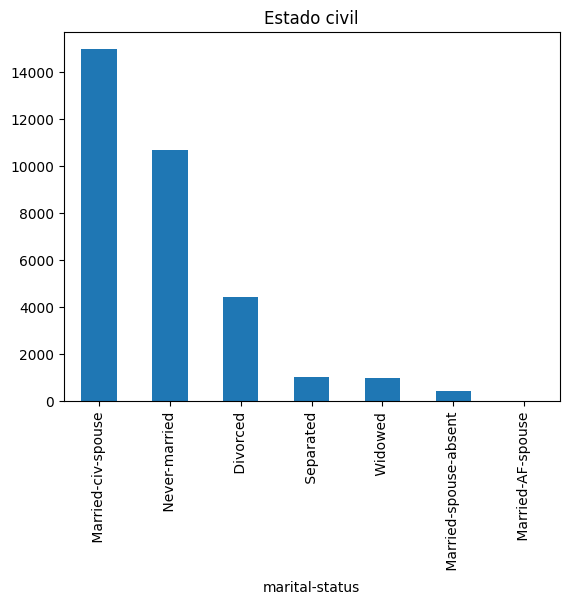

In [15]:
data['marital-status'].value_counts().plot(kind='bar', title = 'Estado civil');


Vamos corrigir os dados com ponto de interrogação.

In [16]:
data.loc[(data['occupation'] == ' ?') & (data['age'] <=21)]

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
201,19,?,170653,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,40,Italy,<=50K
243,20,?,119156,Some-college,10,Never-married,?,Own-child,White,Male,0,0,20,United-States,<=50K
266,19,?,218956,Some-college,10,Never-married,?,Own-child,White,Male,0,0,24,Canada,<=50K
312,19,?,860348,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32275,20,?,99891,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
32310,21,?,205939,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
32335,18,?,156608,11th,7,Never-married,?,Own-child,White,Female,0,0,25,United-States,<=50K


In [17]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
data['workclass'].replace({' ?': ' Self-emp-not-inc'}, inplace= True)

/tmp/ipykernel_15234/2030470913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({' ?': ' Self-emp-not-inc'}, inplace= True)


Por se tratar de idade universitária decidimos optamos pela workclass Self-emp-not-inc significa que estão fora do mercado de trabalho ou nunca iniciaram um trabalho essa classe cobre bem, pois provavelmente temos pessoas com mais de 21 anos nessa classe.

In [19]:
data.iloc[[243]]

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
243,20,Self-emp-not-inc,119156,Some-college,10,Never-married,?,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
data.loc[(data['occupation'] == ' ?')]

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
27,54,Self-emp-not-inc,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,Self-emp-not-inc,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,Self-emp-not-inc,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,Self-emp-not-inc,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,Self-emp-not-inc,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Self-emp-not-inc,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Self-emp-not-inc,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Self-emp-not-inc,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Self-emp-not-inc,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [22]:
data['occupation'].replace({' ?': ' Other-service'}, inplace= True)

/tmp/ipykernel_15234/1037181472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace({' ?': ' Other-service'}, inplace= True)


In [23]:
data.iloc[[77]]

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
77,67,Self-emp-not-inc,212759,10th,6,Married-civ-spouse,Other-service,Husband,White,Male,0,0,2,United-States,<=50K


Aqui optamos pela classe other-service para por se tratar de uma classe que cobre praticamentos todos os caso. Ela é genérica o bastante para podermos usar como coringa. 

Vamos agora ver se homens ganham mais que mulheres na média.

In [24]:
homes = data.loc[data['sex'] == ' Male']
mulheres = data.loc[data['sex'] == ' Female']

In [25]:
homes.loc[data['income'] == ' >50K'].count()

age               6662
workclass         6662
final-weight      6662
education         6662
education-num     6662
marital-status    6662
occupation        6662
relationship      6662
race              6662
sex               6662
capital-gain      6662
capital-loos      6662
hour-per-week     6662
native-country    6662
income            6662
dtype: int64

Repare que homens acima de 50K ao ano temos 6.662 vamos ver as mulheres

In [26]:
mulheres.loc[data['income'] == ' >50K'].count()

age               1179
workclass         1179
final-weight      1179
education         1179
education-num     1179
marital-status    1179
occupation        1179
relationship      1179
race              1179
sex               1179
capital-gain      1179
capital-loos      1179
hour-per-week     1179
native-country    1179
income            1179
dtype: int64

As mulheres representa apenas 1.179 vamos ver a porcentagem de mulheres que ganham acima de 50K

In [27]:
1179/(6662+1179) * 100

15.036347404667772

Olha mesmo as mulheres sendo metade da base de dados ela corresponde a 15,07% mesmo se duplicarmos esse número acaba sendo menor que os 50% então mesmo com a menor as mulheres ganham menos que as mulheres.

Vamos salvar os dados modificados e ir para os modelos de classificação.

In [28]:
data.to_parquet('../data/census.parquet')

Salvamos em formato parquet para economizar os dados em memória, isso é bom para quando um sistema crescer em armazenamento. 